# Tokens & Embeddings Refresh

## Tokenizers

Similar words are **not positioned closely together**. They are simply a *mechanism* to convert text to numbers. Think of them like *dictionaries* or **phonebooks** - you look up someone's name and return their number. That's it.

Think about it - unless we are doing whitespace tokenization, we often break up into subwords anyway, so it wouldn't make sense to group similar words.

Tokenizers create an index/lookup table

In [ ]:
vocab = {"cat": 0, "dog": 1, "the": 2, "sat": 3}
text = "the cat sat"
[vocab[word] for word in text.split()]

[2, 0, 3]

Notice "cat" (0) and "dog" (1) are next to each other numerically, but only because we happened to add them in that order, not because they're semantically related

> Tokenizers: words > numbers (tokens; arbitrary, no meaning)

? still unsure how one would train a tokenizer

## Encoder

> Encoder: tokens > semantic meaning (embeddings)

Embeddings are high-dimensional (ie. 768 dimensions) vectors that **encode meaning**. In other words, *similar embeddings are semantically related*.

You can do math on embeddings: 

```
Paris - France + Italy ≈ Rome
```

> Tokenizers are **discrete** representations - whole numbers that serve as lookup indices, like an address book that returns an address. There's no inherent meaning in the addresses themselves - they are arbitrary.

> Embeddings (generated by encoders) are **continuous** representations - vectors that encode semantic meaning. Think of it like a map - unlike just getting the address, embeddings allow you to 'see' how close things are to each other, what is nearby; they are the coordinates (not arbitrary).

### Encoder-only

Without getting too into the weeds, for our task we are focusing on **encoder-only** models, meaning we pass in *tokens* and output *embeddings*. This is distinct from encoder-decoder and decoder-only models which output human-interpretable content (coherent text, images, etc).

BERT, RoBERTa are examples of encoder-only models

? I cannot recall how decoder-only models work?

### Training an Encoder Model

Oversimplifying, but focusing on a key aspect that these models are *first* trained using **Masked Language Modeling (MLM)**. This creates a **base model**

This *still produces embeddings* but the embeddings are *not yet trained to group similar items together*.

! feel like this is easy in hindsight - there is so much text, generating this data is trivial. You can programatically remove random words, not much thought required to generate this dataset

```
Input:  "The [MASK] sat on the mat"
Output: "cat" (using both left AND right context)
```

In order to make use of a base model, you need to **fine tune** it to *explicitly group similar concepts*. This is done via **contrastive learning**.

```python
# Fine-tuning to learn "similar things should be close"

anchor = encode("running shoes")
positive = encode("athletic footwear")  # similar meaning
negative = encode("kitchen blender")    # different meaning

# Push anchor closer to positive, further from negative
loss = distance(anchor, positive) - distance(anchor, negative)   # where distance can be cosine similarity
update_weights(loss)
```

! this is where you would need a currated dataset that never existed before - generating pairs or triplets of similar and dissimilar concepts. Can't be done via a mindless Python script (pre-LLM)

So things like `sentence-transformers` take a base model like BERT and fine-tune it with contrastive learning, so that semantically similar sentences end up with **similar embeddings** (vectors that are close together in the embedding space). You then compute similarity between embeddings yourself (e.g., cosine similarity) to get that single number.

### ModernBERT

ModernBERT is a recent encoder developed by Answer.AI. It improves on the original BERT with a larger context window (8192 tokens vs BERT's 512) and architectural updates like rotary positional embeddings and Flash Attention.

Fine-tuning ModernBERT (and similar imporved base models) can produce encoders with more precise embeddings. Using the map analogy: a basic encoder might only distinguish 'near the pond' vs 'near the hill', while a better encoder can pinpoint '3 metres from the pond's eastern edge' — more granular coordinates for the same concepts.

? surely ModernBERT has *some* language understanding such that its embeddings could be used for some kind of similarity analysis? it just wouldn't be as good as one fined tuned exactly for that purpose

## Summary

* Tokens are discrete numerical representations of text without semantic meaning or order
* Embeddings are continuous representations that capture relationships between concepts
* Encoders generate embeddings
    * Trained via MLM
    * Can be further fine-tuned to produce embeddings can be used for tasks like semantic similarity


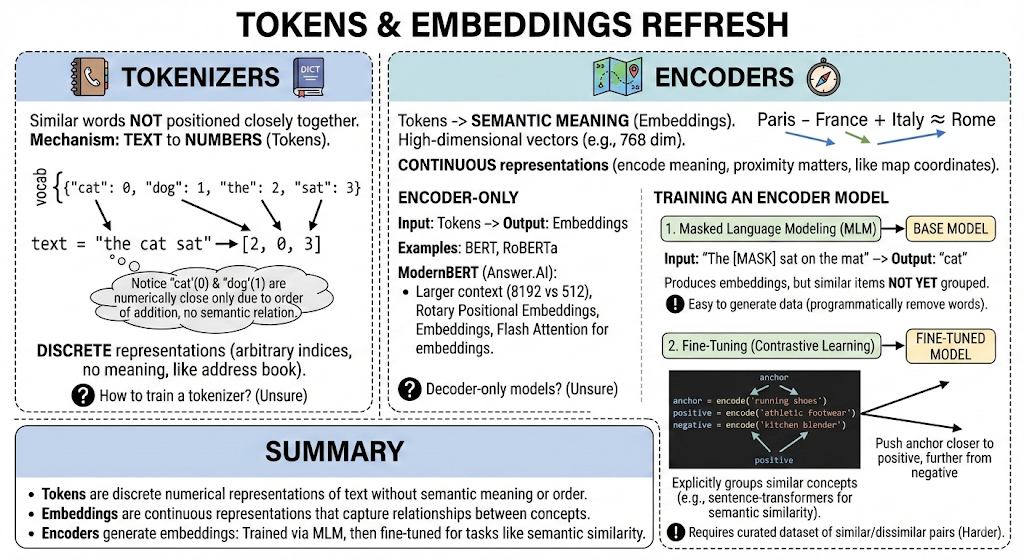


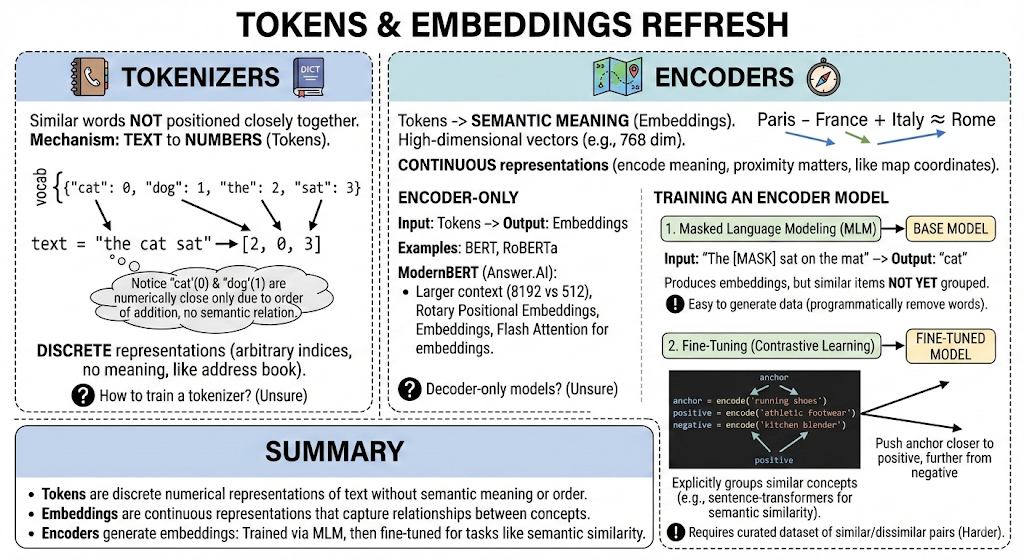